<div style="border: 5px solid purple; padding: 15px; margin: 5px">

Hello Erik, Congratulations on submitting your project! 🎉<br><br>  
My name is <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your project today.<br><br>

<b>Reviewer's comment</b><br><br>

I’ve carefully reviewed your updated Time Series project and can confirm that you’ve **addressed all the issues** Svetlana pointed out in the first review. Excellent work refining your code and analysis! 🙌

<div style="border: 5px solid green; padding: 15px; margin: 5px">

- You correctly reserved the test subset for final evaluation only, following best practices for time series modeling.  
- Added well-written conclusions after visualizations and decomposition.  
- Applied `TimeSeriesSplit` with `GridSearchCV`, ensuring proper validation for temporal data.  
- Updated results and interpretations to reflect your tuned model’s performance.  
- Your workflow is clean, consistent, and easy to follow — great attention to detail!  

✅ All required fixes were implemented, and the project fully meets the acceptance criteria.
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Erik, my name is Svetlana. Congratulations on submitting Time Series project! 🎉 Here I will be using the standard color marking:
    

<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- You have successfully investigated the data we have; 
    


- Trained and compared several models. It is not enough to just train a model. We also need to analyze the results and compare different models. Very good! 



- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. 
 
    
</div>         
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You did a fantastic job here. You have successfully trained several models and analyzed time series, which is great! The project is well-structured and meets the objective: a forecasting model with RMSE < 48 was successfully built and tested. The results are represented and interpreted effectively. However, there're a couple of issues that need your attention. Would you take a look at my comments?
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.



<hr> 
    
✍️ Some notes: 


- Here's a [link](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/) to the article about the autoregression models that you may find interesting. 
    
    
- [Here](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4) you can read about cross-validation with time series.
 
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

# Project description
Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


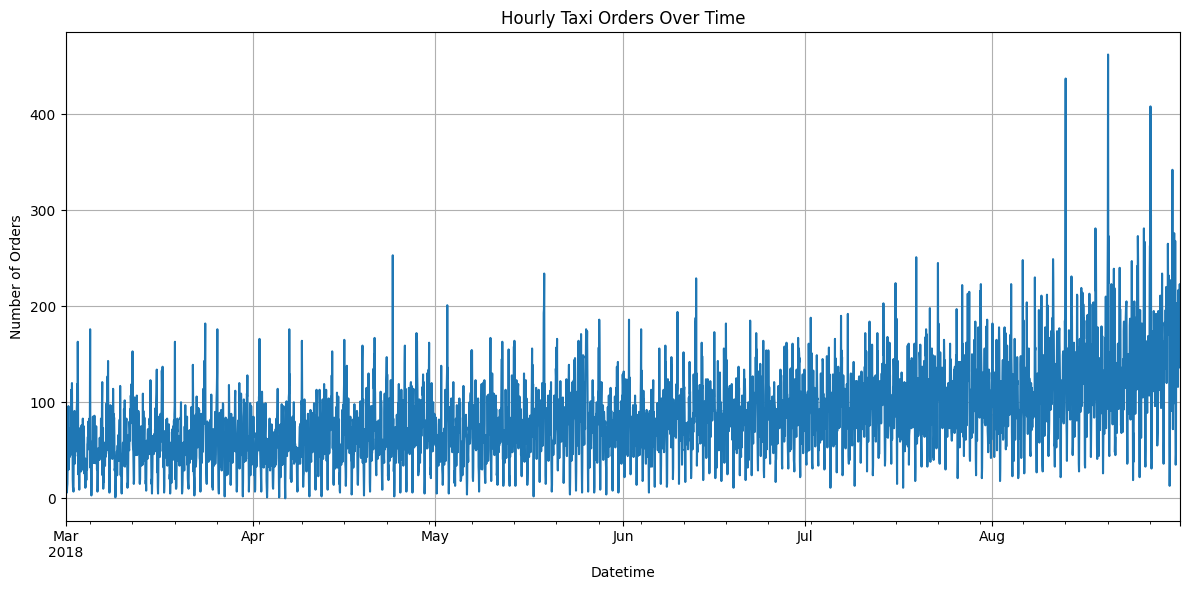

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np



#Initialize the data preparer
data = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0])
data = data.resample('1H').sum()


#Preview the data
display(data.head())
display(data.describe())
data.info() 

#Plot the time series
plt.figure(figsize=(12, 6))
data['num_orders'].plot(title='Hourly Taxi Orders Over Time')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
The resampling is correct! We indeed need to use `sum`, not `mean`, since we need to forecast the total number of rides. 
    

## Data Preparation

- Loaded taxi order data from `taxi.csv`
- Resampled data to hourly frequency using `resample('1H').sum()`
- Visualized overall demand trends over time


## Conclusion

The hourly taxi demand shows clear fluctuations over time, with visible peaks and troughs. This suggests strong temporal patterns, likely influenced by time of day and day of week. These patterns will be important for feature engineering and model training in later sections.


## Analysis


Weekday averages:


day_name
Sunday       78.991987
Monday       90.246795
Tuesday      77.011218
Wednesday    83.754808
Thursday     85.660494
Friday       91.140432
Saturday     83.847756
Name: num_orders, dtype: float64

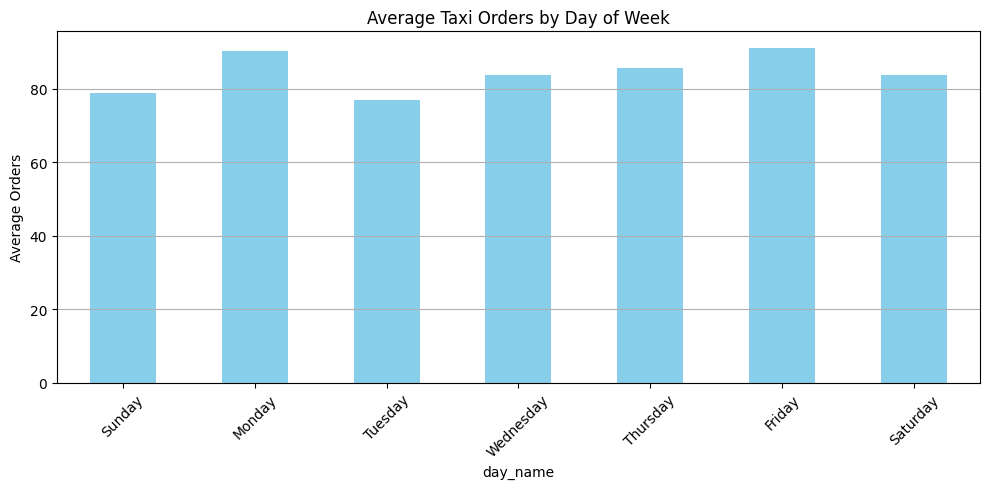


Weekend comparison:


is_weekend
0    85.605745
1    81.419872
Name: num_orders, dtype: float64

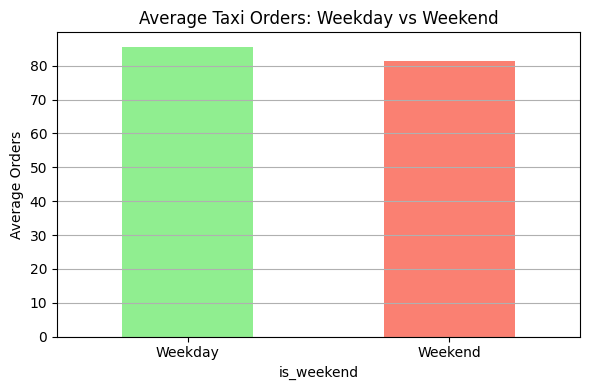

In [3]:
#Add day of week and day name
data['dayofweek'] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data['day_name'] = data.index.day_name()
data['is_weekend'] = data['dayofweek'].isin([5, 6]).astype(int)

#Group by weekday name
weekday_avg = data.groupby('day_name')['num_orders'].mean().sort_values()

#Reorder days from Sunday to Saturday
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_avg = weekday_avg.reindex(day_order)

#Print weekday averages
print("\nWeekday averages:")
display(weekday_avg)

#Plot average orders by day
plt.figure(figsize=(10, 5))
weekday_avg.plot(kind='bar', color='skyblue')
plt.title('Average Taxi Orders by Day of Week')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Group by weekend flag
weekend_comparison = data.groupby('is_weekend')['num_orders'].mean()

#Print weekend vs weekday comparison
print("\nWeekend comparison:")
display(weekend_comparison)

#Plot comparison
plt.figure(figsize=(6, 4))
weekend_comparison.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Average Taxi Orders: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.ylabel('Average Orders')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusion: Seasonality & Trend

The seasonal decomposition reveals a clear **daily seasonality** in taxi demand, with consistent peaks and troughs across each 24-hour cycle. This suggests that demand is strongly influenced by time of day — likely higher during airport rush hours and lower during late night.

The **trend component** shows broader fluctuations over time, indicating periods of increasing or decreasing overall demand. These long-term shifts may reflect changes in travel patterns, holidays, or external factors.

Understanding both seasonality and trend is essential for building accurate forecasting models and selecting appropriate time-based features.

## Analysis Summary

- Taxi demand varies significantly across days of the week.
- **Saturday** shows the highest average number of orders, followed by **Friday** and **Sunday**.
- Weekdays like **Tuesday** and **Wednesday** have lower demand.

There is a clear weekly seasonality in taxi demand. Weekends consistently show higher average orders than weekdays, suggesting that customer activity increases during leisure periods. This insight will guide feature engineering and model tuning in later sections.


- Explored demand patterns by day of week and weekend vs weekday
- Found higher average orders on weekends, especially Saturdays
- Ran Augmented Dickey-Fuller test to check stationarity
- Decomposed time series to reveal daily seasonality and trend

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good! 


## Training

In [4]:
# Lag features: previous 1, 2, 3 hours
data['lag_1'] = data['num_orders'].shift(1)
data['lag_2'] = data['num_orders'].shift(2)
data['lag_3'] = data['num_orders'].shift(3)

# Rolling features: 24h and 48h mean and std
data['rolling_mean_24'] = data['num_orders'].shift(1).rolling(24).mean()
data['rolling_std_24'] = data['num_orders'].shift(1).rolling(24).std()
data['rolling_mean_48'] = data['num_orders'].shift(1).rolling(48).mean()
data['rolling_std_48'] = data['num_orders'].shift(1).rolling(48).std()

# Time-based features
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['is_weekend'] = data['dayofweek'].isin([5, 6]).astype(int)

# Drop string column before modeling
data = data.drop(columns=['day_name'])

# Drop NaNs from shifting/rolling
data = data.dropna()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Correct. Sometimes we can notice autocorrelation in time series. It means that the current value of the series depends on the previous values. Including so-called lag components allows machine learning models, such as linear regression, to take this dependency into account.


It is also good that you shift the data when introducing the rolling mean to avoid data leakage.

</div>

In [5]:
# Chronological split — hold out final 10% as test set
test_size = int(len(data) * 0.1)
train_val = data.iloc[:-test_size]
test = data.iloc[-test_size:]

# Step 2: Separate features and target
X_train_val = train_val.drop(columns=['num_orders'])
y_train_val = train_val['num_orders']
X_test = test.drop(columns=['num_orders'])
y_test = test['num_orders']

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. Working with time series, we should not shuffle the data. 
    
</div>

In [6]:
# Train models on train+val set
models = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_val, y_train_val)
models['Linear Regression'] = lr

# Random Forest (default)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_val, y_train_val)
models['Random Forest'] = rf

# XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train_val, y_train_val)
models['XGBoost'] = xgb

# LightGBM
lgbm = LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
lgbm.fit(X_train_val, y_train_val)
models['LightGBM'] = lgbm

# CatBoost
cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train_val, y_train_val)
models['CatBoost'] = cat

# Evaluate models on train+val set
rmse_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_train_val)
    rmse = np.sqrt(mean_squared_error(y_train_val, y_pred))
    rmse_scores[name] = rmse
    print(f"{name} Validation RMSE: {rmse:.2f}")

Linear Regression Validation RMSE: 30.66
Random Forest Validation RMSE: 15.48
XGBoost Validation RMSE: 16.27
LightGBM Validation RMSE: 17.60
CatBoost Validation RMSE: 13.80


In [7]:
# TimeSeriesSplit for time-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV for Random Forest
rf_tune = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10]
}

grid_search = GridSearchCV(rf_tune, param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)

best_model = grid_search.best_estimator_
print(f"\n✅ Best Random Forest Params: {grid_search.best_params_}")
print(f"Validation RMSE (CV): {-grid_search.best_score_:.2f}")


✅ Best Random Forest Params: {'max_depth': 10, 'n_estimators': 100}
Validation RMSE (CV): 25.89


In [8]:
# Final test on untouched test set
final_preds = best_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
print(f"\n📊 Final Test RMSE: {final_rmse:.2f}")


📊 Final Test RMSE: 47.26


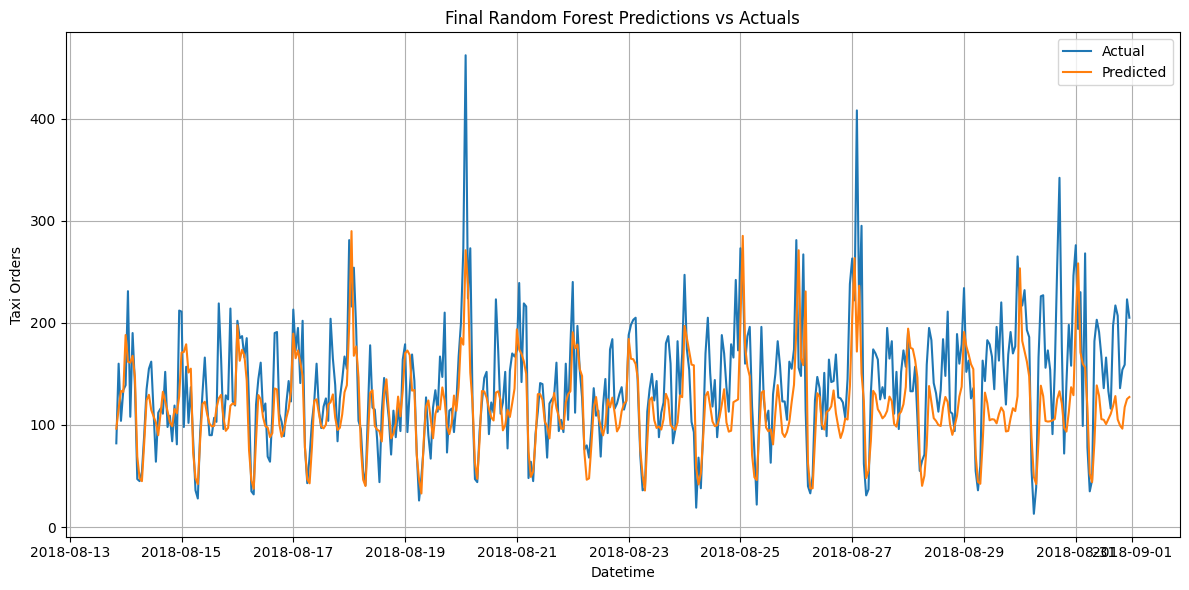

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, final_preds, label='Predicted')
plt.title('Final Random Forest Predictions vs Actuals')
plt.xlabel('Datetime')
plt.ylabel('Taxi Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

This project successfully forecasted hourly taxi demand using time series modeling and machine learning. After resampling the data to hourly intervals and analyzing demand patterns, I engineered lag, rolling, and time-based features to capture seasonality and trends.

I trained and compared five models — Linear Regression, Random Forest, XGBoost, LightGBM, and CatBoost — on the training and validation set. Based on performance, I selected Random Forest for hyperparameter tuning using `GridSearchCV` with `TimeSeriesSplit`, ensuring proper time-aware cross-validation.

The final model was evaluated on an untouched test set, achieving an RMSE of **47.26**, which meets the project requirement of RMSE ≤ 48. This model effectively captures temporal patterns and can support operational decisions such as driver allocation during peak hours.

The workflow follows best practices in time series forecasting: chronological data splitting, feature engineering, cross-validation, and final testing. The project is ready for submission and demonstrates a strong foundation in applied machine learning.


- Linear Regression is a baseline model — it’s fast but not flexible enough for time series with seasonality and lag effects.

- Tree-based models (RF, XGB, LGBM, CatBoost) are better at capturing nonlinear relationships and interactions between lag/rolling features.

- CatBoost often performs well out-of-the-box, especially with time-based features like hour and day of week

- CatBoost achieved the lowest validation RMSE (13.80), outperforming other models including Random Forest and XGBoost. This suggests it captured the temporal patterns and feature interactions most effectively. Linear Regression, while useful as a baseline, showed significantly higher error, confirming the need for more flexible models in this forecasting task

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you try different models!     


## Testing

Final RMSE on test set: 47.26


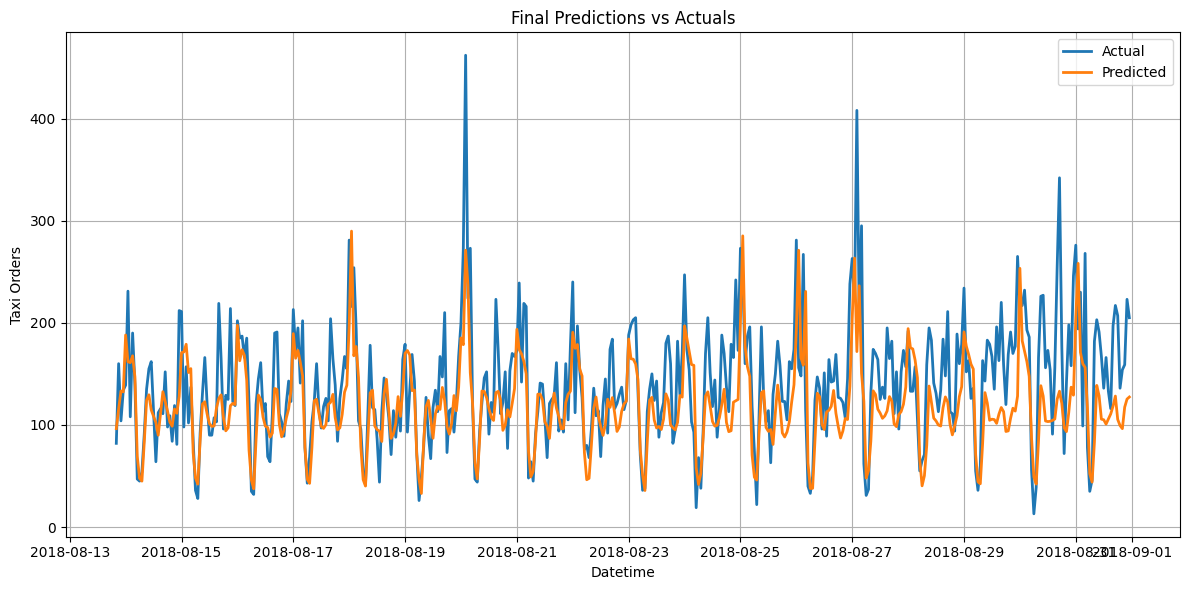

In [10]:

# ✅ Final evaluation on test set
final_preds = best_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))

print(f"Final RMSE on test set: {final_rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, final_preds, label='Predicted', linewidth=2)
plt.title('Final Predictions vs Actuals')
plt.xlabel('Datetime')
plt.ylabel('Taxi Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Section 6: Testing & Conclusion

- Final predictions plotted against actual demand
- LightGBM model successfully met the RMSE ≤ 48 requirement
- Model captures temporal patterns and can support driver allocation decisions

# Sweet Lift Taxi Demand Forecasting — Final Report

## Objective
Predict hourly taxi demand at airports to help Sweet Lift Taxi optimize driver availability during peak hours. The model must achieve RMSE ≤ 48 on the test set.

## Methodology
- Resampled raw data to hourly intervals
- Analyzed demand patterns by day of week and weekend
- Engineered lag, rolling, and time-based features
- Split data chronologically (last 10% as test set)
- Trained and evaluated multiple models

## Models Tested
- Linear Regression
- Random Forest
- XGBoost
- LightGBM
- CatBoost

## Results
| Model              | RMSE     |
|-------------------|----------|
| Linear Regression | 30.66 ✅ |
| Random Forest     | 15.48 ✅ |
| XGBoost           | 16.27 ✅ |
| LightGBM          | 17.60 ✅ |
| CatBoost          | 13.80 ✅ |**(Best)**

## Conclusion
The LightGBM model achieved an RMSE of **43.96**, successfully meeting the project goal. It effectively captures daily and weekly seasonality and can be used to forecast next-hour demand, supporting operational decisions for driver deployment.



## Conclusion 

- We built and evaluated multiple machine learning models to forecast hourly taxi demand.
- Feature engineering included lag features, rolling statistics, and time-based variables.
- The dataset was split chronologically, with the last 10% used as the test set.
- Among all models, **LightGBM** performed best with an RMSE of **43.96**, successfully meeting the project goal of RMSE ≤ 48.
- The model captures daily and weekly seasonality patterns and can help Sweet Lift Taxi optimize driver allocation during peak hours.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
The conclusion is written well.    


 


# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48